In [205]:
import errno
import pandas as pd
import glob
import csv
import numpy as np 
import os.path
from pathlib import Path
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

print("getting ready to work with the dataset")
# get names of all csv files in this folder
csvFile = pd.read_csv("./petrophysics.csv")


# train = data[row]
# test = data[-r?ow]

getting ready to work with the dataset


In [206]:

csvFile.drop(["latitude", "longitude", "UWI"], axis = 1, inplace = True)


In [207]:
member = csvFile.iloc[:,-2]
csvFile.drop("member", axis = 1, inplace = True)

In [208]:
# print(member)
dict_map = {}
count = 1
for x in member:
    if x not in dict_map:
        dict_map[x] = count
        count += 1
# print(dict_map)

i = 0
temp = []
for x in member:
    temp.append(dict_map[x])
#     i += 1

# print(temp)
csvFile["member"] = temp
pd.set_option('display.max_rows', None) 
csvFile.head()

,depth,gamma,neutron porosity,pe,sp,formation,member
0,1836.5,80.2863,0.3379,3.2272,37.4190,Tfu,1
1,1837.0,78.5425,0.3472,3.2937,36.5917,Tfu,1
2,1837.5,78.4482,0.3655,3.3742,35.4404,Tfu,1
3,1838.0,76.6573,0.3906,3.5218,34.0309,Tfu,1
4,1838.5,74.6307,0.4042,3.7706,33.0401,Tfu,1


In [209]:
csvFile.drop("formation", axis = 1, inplace = True)


In [210]:
csvFile.head()

,depth,gamma,neutron porosity,pe,sp,member
0,1836.5,80.2863,0.3379,3.2272,37.4190,1
1,1837.0,78.5425,0.3472,3.2937,36.5917,1
2,1837.5,78.4482,0.3655,3.3742,35.4404,1
3,1838.0,76.6573,0.3906,3.5218,34.0309,1
4,1838.5,74.6307,0.4042,3.7706,33.0401,1


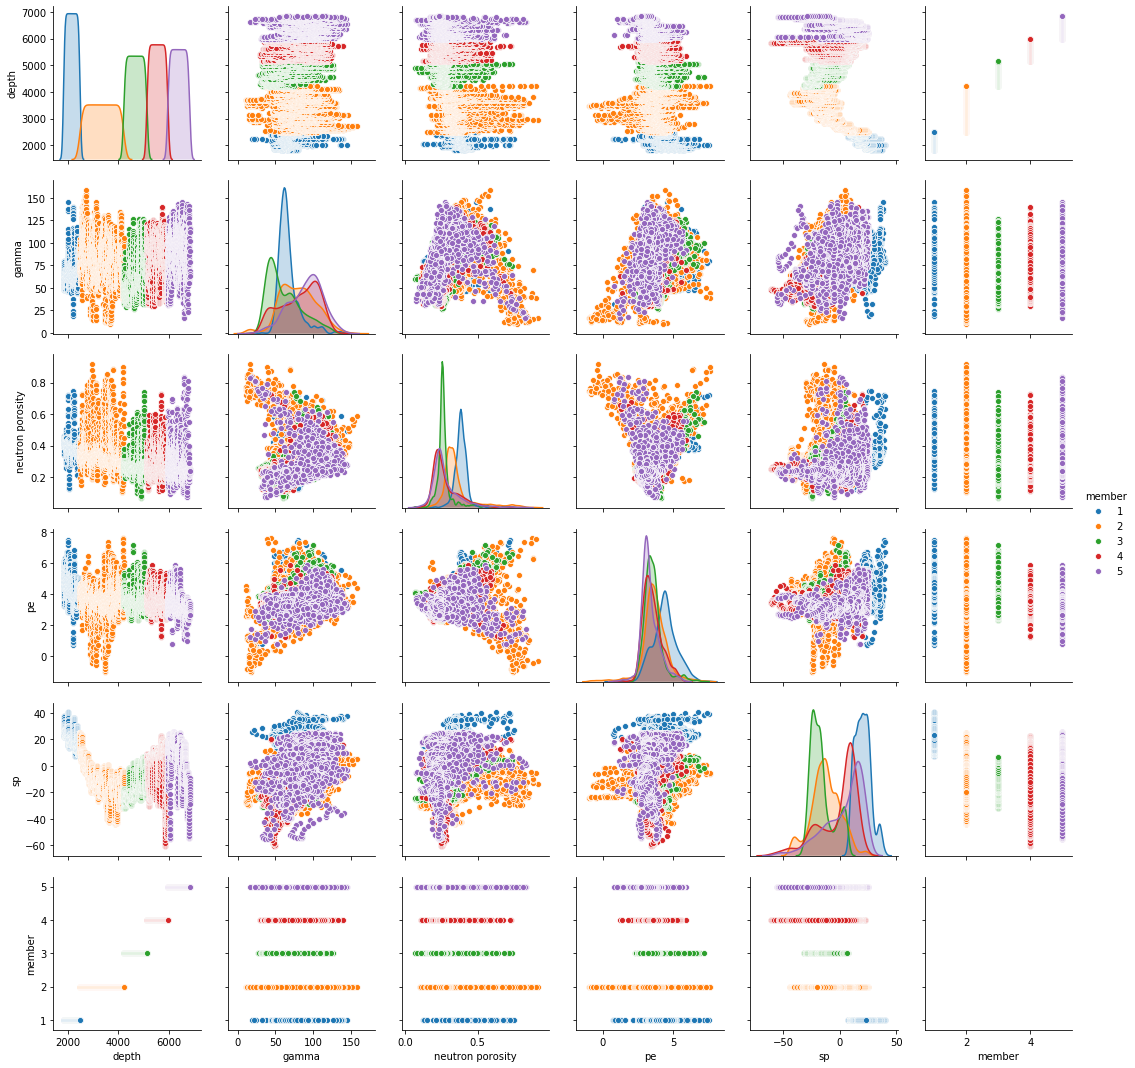

In [227]:
sns.pairplot(data=csvFile, hue='member')

In [221]:
X_train, X_test, y_train, y_test = train_test_split(csvFile.iloc[:, 0:-1], csvFile.iloc[:,-1], test_size=0.25, random_state=42)

In [223]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [224]:
y_pred = knn.predict(X_test)

NameError: name 'confusion_matrix' is not defined